# Pneumonia Detection Analysis - Image Classification with Deep Learning

### Overview

Pneumonia is the single largest cause of death in children worldwide.

Every year, it kills an estimated 1.4 million children under the age of five years, accounting for 18% of all deaths of children under five years old worldwide.

### Problem
Can we build an image classification model to detect if a child has pneumonia given an X-Ray of their lungs?


# EDA

In [32]:
# !pip install pillow

In [33]:
#importing libraries
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#random seed to get reproducable results
from numpy.random import seed
seed(7)

Separating the images by training/validation/test and seeing the counts.

In [34]:
imgs_train_normal = [file for file in os.listdir('Data/train/NORMAL') if file.endswith('.jpeg')]
print('There are', len(imgs_train_normal), 'normal training images')

imgs_train_pneumonia = [file for file in os.listdir('Data/train/PNEUMONIA') if file.endswith('.jpeg')]
print('There are', len(imgs_train_pneumonia), 'pneumonia training images')

imgs_test_normal = [file for file in os.listdir('Data/test/NORMAL') if file.endswith('.jpeg')]
print('There are', len(imgs_test_normal), 'normal test images')

imgs_test_pneumonia = [file for file in os.listdir('Data/test/PNEUMONIA') if file.endswith('.jpeg')]
print('There are', len(imgs_test_pneumonia), 'pneumonia test images')

imgs_val_normal = [file for file in os.listdir('Data/val/NORMAL') if file.endswith('.jpeg')]
print('There are', len(imgs_val_normal), 'normal val images')

imgs_val_pneumonia = [file for file in os.listdir('Data/val/PNEUMONIA') if file.endswith('.jpeg')]
print('There are', len(imgs_val_pneumonia), 'pneumonia val images')

There are 1341 normal training images
There are 3875 pneumonia training images
There are 234 normal test images
There are 390 pneumonia test images
There are 8 normal val images
There are 8 pneumonia val images


### Visualizing how many images in a bar graph

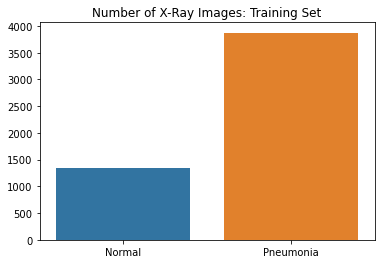

In [35]:
ax = sns.barplot(x = ['Normal', 'Pneumonia'],
                 y = [len(imgs_train_normal), len(imgs_train_pneumonia)]);
ax.set_title("Number of X-Ray Images: Training Set");

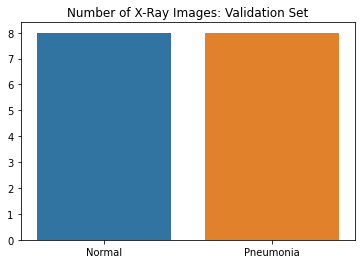

In [36]:
ax = sns.barplot(x = ['Normal', 'Pneumonia'],
                 y = [len(imgs_val_normal), len(imgs_val_pneumonia)]);
ax.set_title("Number of X-Ray Images: Validation Set");

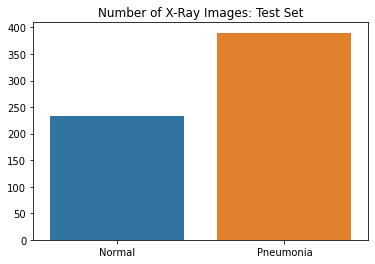

In [37]:
ax = sns.barplot(x = ['Normal', 'Pneumonia'],
                 y = [len(imgs_test_normal), len(imgs_test_pneumonia)]);
ax.set_title("Number of X-Ray Images: Test Set");

### Load data from directory

In [38]:
train_data_dir = 'Data/train'
test_data_dir = 'Data/test'
val_data_dir = 'Data/val'

# Get all the data in the directory data, standardize and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), batch_size=5216, class_mode='binary')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), batch_size=624, class_mode='binary')

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), batch_size=16, class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Let's preview which class corresponds with Normal/Pneumonia.

In [39]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Let's explore out dataset size/shape.

In [40]:
# Explore dataset
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 128, 128, 3)
train_labels shape: (5216,)
test_images shape: (624, 128, 128, 3)
test_labels shape: (624,)
val_images shape: (16, 128, 128, 3)
val_labels shape: (16,)


Reshape our images for processing.

In [41]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 49152)
(624, 49152)
(16, 49152)


Preview our first 4 labels.

In [42]:
train_labels[:4]

array([0., 0., 1., 1.], dtype=float32)

Plot our first 4 X-Rays.

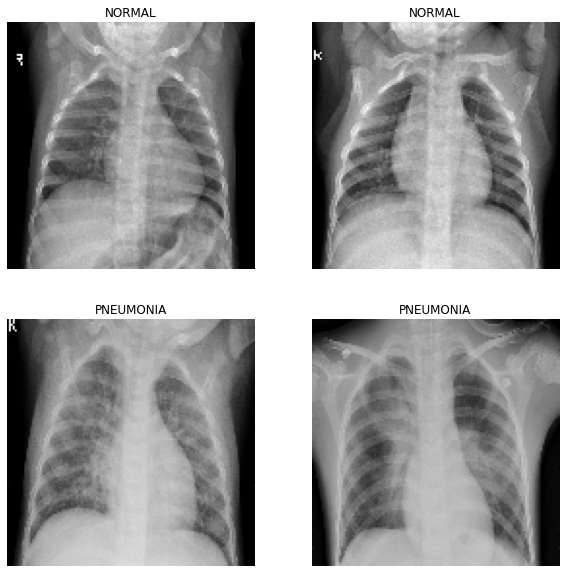

In [43]:
plt.subplots(figsize=(10,10))

for n in range(4):
    ax = plt.subplot(2,2,n+1)
    plt.imshow((train_images[n]))
    if train_labels[n] == 1:
        plt.title("PNEUMONIA")
    else:
        plt.title("NORMAL")
    plt.axis("off")

In [75]:
#additional imports for modeling
from keras import models
from keras import layers
import keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Modeling

### Model 1 - Densely Connected Network (baseline)

In [45]:
#instatiate model
model_1 = models.Sequential()

#add layers
model_1.add(layers.Dense(20, activation='relu', input_shape=(49152,))) # 2 hidden layers
model_1.add(layers.Dense(7, activation='relu'))
model_1.add(layers.Dense(5, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

In [46]:
#compile layers
model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#fitting model
history = model_1.fit(train_img,
                    train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_labels))

Epoch 1/50
163/163 [==============================] - 31s 188ms/step - loss: 0.6572 - accuracy: 0.7402 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 5s 32ms/step - loss: 0.6106 - accuracy: 0.7429 - val_loss: 0.7299 - val_accuracy: 0.5000
Epoch 3/50
163/163 [==============================] - 3s 19ms/step - loss: 0.5896 - accuracy: 0.7429 - val_loss: 0.7525 - val_accuracy: 0.5000
Epoch 4/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5798 - accuracy: 0.7429 - val_loss: 0.7708 - val_accuracy: 0.5000
Epoch 5/50
163/163 [==============================] - 2s 15ms/step - loss: 0.5750 - accuracy: 0.7429 - val_loss: 0.7856 - val_accuracy: 0.5000
Epoch 6/50
163/163 [==============================] - 2s 14ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.7965 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.8048 - val_accuracy: 0.50

Look at test/train results.

In [47]:
results_train = model_1.evaluate(train_img, train_labels)
results_train

163/163 [==============================] - 1s 8ms/step - loss: 0.5700 - accuracy: 0.7429


[0.5699950456619263, 0.7429064512252808]

In [48]:
results_test = model_1.evaluate(test_img, test_labels)
results_test

20/20 [==============================] - 0s 20ms/step - loss: 0.6952 - accuracy: 0.6250


[0.6952418088912964, 0.625]

74% on the training set and 62.5% on the testing set.

Now let's look at which epochs were the best performing.

In [49]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 1)    
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    
    plt.show()
    print("The highest validation accuracy was",history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['val_accuracy'])
    print("The lowest validation accuracy was",history.sort_values(by = 'val_accuracy', ascending = True).iloc[0]['val_accuracy'])
    

def plot_loss(history, ax = None, xlabel = 'Epoch #'):
    
    history = history.history
    history.update({'epoch':list(range(len(history['val_loss'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_loss', ascending = True).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_loss', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'loss', data = history, label = 'Training', ax = ax)
    
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 1)    
    ax.set_ylim([0.1, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Loss (Fraction)')
    
    plt.show()
    print("The lowest validation loss was",history.sort_values(by = 'val_loss', ascending = True).iloc[0]['val_loss'])
    print("The highest validation loss was",history.sort_values(by = 'val_loss', ascending = False).iloc[0]['val_loss'])

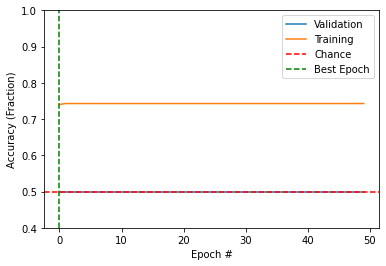

The highest validation accuracy was 0.5
The lowest validation accuracy was 0.5


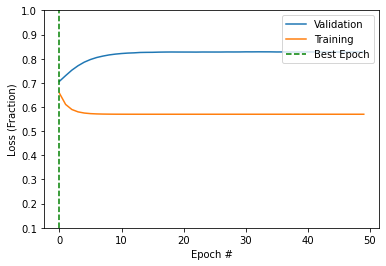

The lowest validation loss was 0.7063047885894775
The highest validation loss was 0.828387975692749


In [50]:
plot_acc(history)
plot_loss(history)

Epoch 20 was the best for validation accuracy and epoch 46 had the lowest validation loss.

### Model 2 - CNN

In [77]:
#instantiate model
model_2 = models.Sequential()

#add layers
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128 ,128,  3)))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

#compile layers
model_2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [52]:
#fit model
history = model_2.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/30
163/163 [==============================] - 123s 755ms/step - loss: 0.5346 - acc: 0.7521 - val_loss: 1.0151 - val_acc: 0.5000
Epoch 2/30
163/163 [==============================] - 124s 763ms/step - loss: 0.3912 - acc: 0.8292 - val_loss: 1.9094 - val_acc: 0.5000
Epoch 3/30
163/163 [==============================] - 193s 1s/step - loss: 0.2717 - acc: 0.8936 - val_loss: 0.5880 - val_acc: 0.7500
Epoch 4/30
163/163 [==============================] - 209s 1s/step - loss: 0.2023 - acc: 0.9216 - val_loss: 0.8841 - val_acc: 0.6250
Epoch 5/30
163/163 [==============================] - 209s 1s/step - loss: 0.1617 - acc: 0.9373 - val_loss: 0.6470 - val_acc: 0.7500
Epoch 6/30
163/163 [==============================] - 199s 1s/step - loss: 0.1469 - acc: 0.9436 - val_loss: 0.3630 - val_acc: 0.8125
Epoch 7/30
163/163 [==============================] - 201s 1s/step - loss: 0.1289 - acc: 0.9526 - val_loss: 0.5139 - val_acc: 0.8125
Epoch 8/30
163/163 [==============================] - 213s 1s/s

Look at test/train results.

In [53]:
results_train = model_2.evaluate(train_images, train_labels)
results_train

163/163 [==============================] - 52s 320ms/step - loss: 0.0404 - acc: 0.9849


[0.040392547845840454, 0.9848542809486389]

In [54]:
results_test = model_2.evaluate(test_images, test_labels)
results_test

20/20 [==============================] - 7s 338ms/step - loss: 1.4749 - acc: 0.7308


[1.474888801574707, 0.7307692170143127]

98% on the training set and 73% on the testing set. An improvement!

##### Let's Try That Again With Some Regularization

In [83]:
#instantiate model
model_2a = models.Sequential()

#add layers
model_2a.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128 ,128,  3)))
model_2a.add(layers.MaxPooling2D((2, 2)))

model_2a.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_2a.add(layers.MaxPooling2D((2, 2)))

model_2a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2a.add(layers.MaxPooling2D((2, 2)))

model_2a.add(layers.Flatten())
model_2a.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model_2a.add(layers.Dropout(0.2))
model_2a.add(layers.Dense(1, activation='sigmoid'))

#compile layers
model_2a.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [84]:
#fit model
history_2a = model_2a.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/30
163/163 [==============================] - 150s 918ms/step - loss: 1.7857 - acc: 0.7416 - val_loss: 2.0139 - val_acc: 0.5000
Epoch 2/30
163/163 [==============================] - 152s 932ms/step - loss: 1.5980 - acc: 0.8000 - val_loss: 1.9054 - val_acc: 0.6250
Epoch 3/30
163/163 [==============================] - 118s 724ms/step - loss: 1.4101 - acc: 0.8687 - val_loss: 1.9851 - val_acc: 0.6250
Epoch 4/30
163/163 [==============================] - 114s 701ms/step - loss: 1.2871 - acc: 0.8940 - val_loss: 1.6053 - val_acc: 0.7500
Epoch 5/30
163/163 [==============================] - 114s 699ms/step - loss: 1.1769 - acc: 0.9195 - val_loss: 2.0303 - val_acc: 0.5625
Epoch 6/30
163/163 [==============================] - 117s 718ms/step - loss: 1.0820 - acc: 0.9302 - val_loss: 1.3340 - val_acc: 0.8125
Epoch 7/30
163/163 [==============================] - 112s 686ms/step - loss: 1.0158 - acc: 0.9360 - val_loss: 1.1655 - val_acc: 0.8750
Epoch 8/30
163/163 [============================

In [85]:
results_train_2a = model_2a.evaluate(train_images, train_labels)
results_train_2a

163/163 [==============================] - 37s 226ms/step - loss: 0.2507 - acc: 0.9839


[0.2507314383983612, 0.9838957190513611]

In [86]:
results_test_2a = model_2a.evaluate(test_images, test_labels)
results_test_2a

20/20 [==============================] - 6s 286ms/step - loss: 1.3817 - acc: 0.7324


[1.3816807270050049, 0.7323718070983887]

98% on the training set and 73% on the testing set. Surprisingly not that different

### Model 3 - LeNet-5

In [65]:
#instantiate the model
model_3 = models.Sequential()

#add layers
model_3.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(128 ,128, 3)))
model_3.add(layers.AveragePooling2D())

model_3.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_3.add(layers.AveragePooling2D())

model_3.add(layers.Flatten())

model_3.add(layers.Dense(units=120, activation='relu'))

model_3.add(layers.Dense(units=84, activation='relu'))

model_3.add(layers.Dense(units=1, activation = 'sigmoid'))

In [66]:
#compile layers
model_3.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [67]:
#fit model
history = model_3.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/30
163/163 [==============================] - 38s 232ms/step - loss: 0.4403 - acc: 0.8075 - val_loss: 0.8984 - val_acc: 0.6250
Epoch 2/30
163/163 [==============================] - 40s 243ms/step - loss: 0.2625 - acc: 0.8928 - val_loss: 0.4572 - val_acc: 0.7500
Epoch 3/30
163/163 [==============================] - 35s 217ms/step - loss: 0.1947 - acc: 0.9202 - val_loss: 0.6468 - val_acc: 0.7500
Epoch 4/30
163/163 [==============================] - 36s 222ms/step - loss: 0.1711 - acc: 0.9321 - val_loss: 0.4701 - val_acc: 0.7500
Epoch 5/30
163/163 [==============================] - 34s 206ms/step - loss: 0.1553 - acc: 0.9404 - val_loss: 0.3268 - val_acc: 0.8750
Epoch 6/30
163/163 [==============================] - 33s 205ms/step - loss: 0.1462 - acc: 0.9454 - val_loss: 0.8558 - val_acc: 0.6250
Epoch 7/30
163/163 [==============================] - 40s 246ms/step - loss: 0.1428 - acc: 0.9450 - val_loss: 0.4651 - val_acc: 0.7500
Epoch 8/30
163/163 [==============================] - 4

Look at train/test results.

In [68]:
results_train = model_3.evaluate(train_images, train_labels)
results_train

163/163 [==============================] - 13s 82ms/step - loss: 0.0675 - acc: 0.9764


[0.06748341023921967, 0.9764187335968018]

In [69]:
results_test = model_3.evaluate(test_images, test_labels)
results_test

20/20 [==============================] - 3s 143ms/step - loss: 0.8526 - acc: 0.7853


[0.8525822162628174, 0.7852563858032227]

97% on the training set and 78% on the testing set. Ok so a little more of an improvement but can also use some regularization

##### Let's Try That Again With Some Regularization

In [91]:
#instantiate the model
model_3a = models.Sequential()

#add layers
model_3a.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(128 ,128, 3)))
model_3a.add(layers.AveragePooling2D())

model_3a.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_3a.add(layers.AveragePooling2D())

model_3a.add(layers.Flatten())

model_3a.add(layers.Dense(units=120, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model_3a.add(layers.Dropout(0.2))

model_3a.add(layers.Dense(units=84, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model_3a.add(layers.Dropout(0.2))

model_3a.add(layers.Dense(units=1, activation = 'sigmoid'))

In [92]:
#compile layers
model_3a.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [93]:
#fit model
history_3a = model_3a.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/30
163/163 [==============================] - 52s 319ms/step - loss: 3.7666 - acc: 0.7611 - val_loss: 3.6968 - val_acc: 0.7500
Epoch 2/30
163/163 [==============================] - 46s 282ms/step - loss: 3.3951 - acc: 0.8543 - val_loss: 3.7404 - val_acc: 0.6875
Epoch 3/30
163/163 [==============================] - 44s 272ms/step - loss: 3.1190 - acc: 0.9059 - val_loss: 3.1422 - val_acc: 0.8125
Epoch 4/30
163/163 [==============================] - 45s 275ms/step - loss: 2.8990 - acc: 0.9183 - val_loss: 3.4379 - val_acc: 0.5625
Epoch 5/30
163/163 [==============================] - 43s 266ms/step - loss: 2.7169 - acc: 0.9275 - val_loss: 3.3496 - val_acc: 0.6250
Epoch 6/30
163/163 [==============================] - 42s 259ms/step - loss: 2.5437 - acc: 0.9390 - val_loss: 2.7811 - val_acc: 0.7500
Epoch 7/30
163/163 [==============================] - 42s 257ms/step - loss: 2.3849 - acc: 0.9387 - val_loss: 2.7043 - val_acc: 0.7500
Epoch 8/30
163/163 [==============================] - 4

In [94]:
results_train_3a = model_3a.evaluate(train_images, train_labels)
results_train_3a

163/163 [==============================] - 15s 92ms/step - loss: 0.5974 - acc: 0.9670


[0.5973795056343079, 0.967024564743042]

In [95]:
results_test_3a = model_3a.evaluate(test_images, test_labels)
results_test_3a

20/20 [==============================] - 3s 161ms/step - loss: 1.2186 - acc: 0.7933


[1.2185906171798706, 0.7932692170143127]

96% on the training set and 79% on the testing set. Our best model so far!

### Model 4 - AlexNet

In [70]:
#instantiate model
model_4 = models.Sequential()

#add layers
model_4.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128 ,128, 3)))
model_4.add(layers.BatchNormalization())
          
model_4.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_4.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model_4.add(layers.BatchNormalization())
          
model_4.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_4.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_4.add(layers.BatchNormalization())
          
model_4.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_4.add(layers.BatchNormalization())
model_4.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2))) 
          
model_4.add(layers.Flatten())
model_4.add(layers.Dense(4096, activation='relu'))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(4096, activation='relu'))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(1, activation='sigmoid')) 

In [71]:
#compile layers
model_4.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [72]:
#fit model
history = model_4.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/30
163/163 [==============================] - 296s 2s/step - loss: 0.3704 - acc: 0.8815 - val_loss: 1.8633 - val_acc: 0.5000
Epoch 2/30
163/163 [==============================] - 286s 2s/step - loss: 0.1575 - acc: 0.9411 - val_loss: 4.4250 - val_acc: 0.5000
Epoch 3/30
163/163 [==============================] - 233s 1s/step - loss: 0.1217 - acc: 0.9555 - val_loss: 1.3273 - val_acc: 0.5000
Epoch 4/30
163/163 [==============================] - 227s 1s/step - loss: 0.0966 - acc: 0.9615 - val_loss: 2.5942 - val_acc: 0.6250
Epoch 5/30
163/163 [==============================] - 238s 1s/step - loss: 0.0744 - acc: 0.9711 - val_loss: 3.3825 - val_acc: 0.5000
Epoch 6/30
163/163 [==============================] - 344s 2s/step - loss: 0.0674 - acc: 0.9760 - val_loss: 2.1356 - val_acc: 0.5625
Epoch 7/30
163/163 [==============================] - 283s 2s/step - loss: 0.0608 - acc: 0.9758 - val_loss: 4.5163 - val_acc: 0.5000
Epoch 8/30
163/163 [==============================] - 237s 1s/step - 

Let's look at train/test results.

In [73]:
results_train = model_4.evaluate(train_images, train_labels)
results_train

163/163 [==============================] - 72s 444ms/step - loss: 7.6233e-05 - acc: 1.0000


[7.623287820024416e-05, 1.0]

In [74]:
results_test = model_4.evaluate(test_images, test_labels)
results_test

20/20 [==============================] - 11s 573ms/step - loss: 2.1633 - acc: 0.7644


[2.1632630825042725, 0.7644230723381042]

100% on the training set and 76% on the testing set. OK...let see if some regularization can help us

##### Let's Try That Again With Some Regularization

In [96]:
#instantiate model
model_4a = models.Sequential()

#add layers
model_4a.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128 ,128, 3)))
model_4a.add(layers.BatchNormalization())
          
model_4a.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_4a.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model_4a.add(layers.BatchNormalization())
          
model_4a.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_4a.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_4a.add(layers.BatchNormalization())
          
model_4a.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_4a.add(layers.BatchNormalization())
model_4a.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_4a.add(layers.BatchNormalization())
model_4a.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2))) 
          
model_4a.add(layers.Flatten())
model_4a.add(layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model_4a.add(layers.Dropout(0.2))
model_4a.add(layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model_4a.add(layers.Dropout(0.2))
model_4a.add(layers.Dense(1, activation='sigmoid')) 

In [97]:
#compile layers
model_4a.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [98]:
#fit model
history_4a = model_4a.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/30
163/163 [==============================] - 250s 2s/step - loss: 68.4814 - acc: 0.9062 - val_loss: 67.8517 - val_acc: 0.5000
Epoch 2/30
163/163 [==============================] - 274s 2s/step - loss: 64.0295 - acc: 0.9509 - val_loss: 63.8802 - val_acc: 0.5000
Epoch 3/30
163/163 [==============================] - 261s 2s/step - loss: 59.9751 - acc: 0.9607 - val_loss: 60.3797 - val_acc: 0.5625
Epoch 4/30
163/163 [==============================] - 255s 2s/step - loss: 56.1645 - acc: 0.9747 - val_loss: 56.6032 - val_acc: 0.6250
Epoch 5/30
163/163 [==============================] - 284s 2s/step - loss: 52.6229 - acc: 0.9758 - val_loss: 51.7381 - val_acc: 0.5625
Epoch 6/30
163/163 [==============================] - 278s 2s/step - loss: 49.2926 - acc: 0.9787 - val_loss: 50.8723 - val_acc: 0.5000
Epoch 7/30
163/163 [==============================] - 481s 3s/step - loss: 46.1766 - acc: 0.9826 - val_loss: 46.0608 - val_acc: 0.5000
Epoch 8/30
163/163 [==============================] - 4

KeyboardInterrupt: 

In [ ]:
results_train_4a = model_4a.evaluate(train_images, train_labels)
results_train_4a

In [ ]:
results_test_4a = model_4a.evaluate(test_images, test_labels)
results_test_4a

# Conclusion

Our regularized LeNet-5 model was the highest performing model with a 96% accuracy on the training set and 79% accuracy on the testing set. We would recommend using this model to detect pneumonia in the X-Rays of children but also believe that given time, we can make a significantly better model